In [74]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
data = sio.loadmat(r"G:\My Drive\uni\Machine Learning intro\Introduction-To-Machine-Learning\ex3\regdata.mat")
Xtrain = np.matrix(data["X"])
Xtest = np.matrix(data["Xtest"])
Ytrain = np.matrix(data["Y"])
Ytest = np.matrix(data["Ytest"])

In [51]:
def loss(w, xi, yi):
    return np.power(np.dot(w.T,xi) - yi ,2)

In [57]:
def total_loss(w, X, Y):
    # print all shapes
    # print(w.shape, X.shape, Y.shape)
    return np.mean([loss(w, X[ : , i], Y[i, 0]) for i in range(X.shape[1])])
 

In [33]:
def get_w(X, Y, l):
    d, m = X.shape
    inverse = np.linalg.inv(np.dot(Xtrain, Xtrain.T) + (np.identity(Xtrain.shape[0]) * l))
    xy = np.dot(X, Y)
    w = np.dot(inverse, xy)
    return w

10 2.0 13.05474723187326
20 6.0 11.173509616940125
30 8.0 9.915730042342622
40 10.0 8.850518035089797
50 11.0 7.766500262088496
60 6.0 5.948885423039672
70 4.0 4.1060851483112994
80 6.0 2.9879820339296113
90 7.0 2.7242334205193774
100 5.0 2.349263784220797


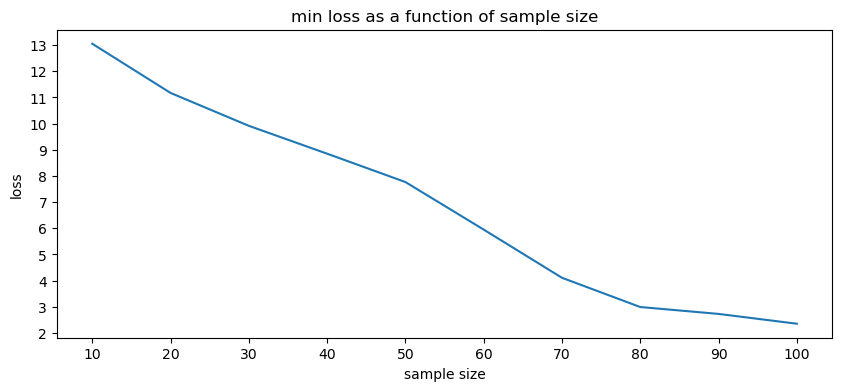

In [81]:
train_sets = np.arange(10, 101, 10)
lambdas = np.arange(1, 31, 1, dtype=float)

min_lambdas = []
losses = []
for m in train_sets:
    min_l = 35.0
    min_loss = np.inf
    for l in lambdas:
        w = get_w(Xtrain[:, :m], Ytrain[:m], l)
        curr_loss = total_loss(w, Xtest, Ytest)
        if curr_loss < min_loss:
            min_loss = curr_loss
            min_l = l
    min_lambdas.append(min_l)
    losses.append(min_loss)
    print(m, min_l, min_loss)

# plot the data
plt.figure(figsize=(10, 4))
ax = plt.axes()
ax.set(xlabel="sample size", ylabel="loss",
        title="min loss as a function of sample size",
        xticks=train_sets, yticks=np.arange(int(min(losses)), int(max(losses) + 1), 1))

plt.plot(train_sets, losses)

        